Chapter 3 Other

In this problem we will investigate the t-statistic for the null hypoth- esis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

(a) Perform a simple linear regression of y onto x, without an in- tercept. Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associ- ated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the keywords argument intercept=False to ModelSpec().)
  rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
   

(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

(c) What is the relationship between the results obtained in (a) and (b)?

(d) For the regression of Y onto X without an intercept, the t- statistic for H0 : β = 0 takes the form βˆ/SE(βˆ), where βˆ is given by (3.38), and where
ˆ 􏰞􏰎ni=1(yi −xiβˆ)2 SE(β)= (n−1)􏰎n x2 .
i′=1 i′
(These formulas are slightly different from those given in Sec- tions 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numeri- cally in R, that the t-statistic can be written as
   (√n − 1) 􏰎ni=1 xiyi
􏰔(􏰎n x2)(􏰎n y2 ) − (􏰎n xi′ yi′ )2 .

(e) Using the results from (d), argue that the t-statistic for the re- gression of y onto x is the same as the t-statistic for the regression of x onto y.

(f) In R, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.


In [16]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS


(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the keywords argument intercept=False to ModelSpec().)

In [10]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [11]:
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 10 Jun 2024   Prob (F-statistic):                    6.23e-31
Time:                        18:04:32   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The coefficient x1 is 1.9762, quite close to the ideal 2 of the model. The p-value is 0, meaning that we have enough evidence to confirm that there is a relationship between x and the response, rejecting therefore the null hypothesis that states that B1 = 0

(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

In [12]:
model = sm.OLS(x, y)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 10 Jun 2024   Prob (F-statistic):                    6.23e-31
Time:                        18:04:34   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

I would have expected something closer to 0.5 as coefficient. The p value in any case, being that small makes us reject the null hypothesis B=0.

(c) What is the relationship between the results obtained in (a) and (b)?

y = 2*x, so x = 0.5*y

(f) In R, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.

In [22]:
X = MS('x').fit_transform(pd.DataFrame({'x': x}))
model3 = sm.OLS(y, X)
results3 = model3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.931e+32
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:24:37   Log-Likelihood:                 3339.5
No. Observations:                 100   AIC:                            -6675.
Df Residuals:                      98   BIC:                            -6670.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -6.245e-17    7.7e-17     -0.811      0.4

In [23]:
Y = MS('y').fit_transform(pd.DataFrame({'y': y}))
model4 = sm.OLS(x, Y)
results4 = model4.fit()

print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.997e+32
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:24:39   Log-Likelihood:                 3383.9
No. Observations:                 100   AIC:                            -6764.
Df Residuals:                      98   BIC:                            -6759.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.735e-17   4.94e-17     -0.351      0.7

This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

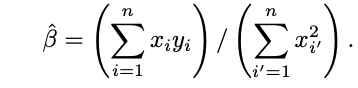

In [25]:
from PIL import Image
from IPython.display import display
img = Image.open('../images/3.38.png')
display(img)

The coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X when the denominator is the same (sum of x^2 == sum of y^2)

(b) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [33]:
x = np.linspace(0, 100.0, 100)
y = np.linspace(0, 50.0, 100)

model1 = sm.OLS(y, x)
results1 = model1.fit()

model2 = sm.OLS(x, y)
results2 = model2.fit()

print(results1.summary())
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.638e+33
Date:                Mon, 10 Jun 2024   Prob (F-statistic):                        0.00
Time:                        21:17:42   Log-Likelihood:                          3155.7
No. Observations:                 100   AIC:                                     -6309.
Df Residuals:                      99   BIC:                                     -6307.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
x = np.linspace(0, 100.0, 100)
y = np.linspace(100, 0, 100)

model1 = sm.OLS(y, x)
results1 = model1.fit()

model2 = sm.OLS(x, y)
results2 = model2.fit()

print(results1.summary())
print(results2.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.243
Model:                            OLS   Adj. R-squared (uncentered):              0.235
Method:                 Least Squares   F-statistic:                              31.70
Date:                Mon, 10 Jun 2024   Prob (F-statistic):                    1.69e-07
Time:                        21:18:38   Log-Likelihood:                         -533.84
No. Observations:                 100   AIC:                                      1070.
Df Residuals:                      99   BIC:                                      1072.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

(c) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.